In [1]:
import importlib
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.ensemble import IsolationForest

In [7]:
X_train = np.load('PCA_Data/X_train_pca.npy')
labels_train = np.load('PCA_Data/labels_list_train.npy')

X_test = np.load('PCA_Data/X_test_pca.npy')
labels_test = np.load('PCA_Data/labels_list_test.npy')

In [11]:
df_train = pd.DataFrame(X_train)
df_train

,0,1,2,3,4,5,6,7,8,9,...,719,720,721,722,723,724,725,726,727,728
0,-8.034966,0.081003,-5.525152,1.705420,4.315992,-0.837846,-0.536390,0.268266,-1.305709,0.476402,...,-0.101615,-0.121137,0.493897,0.390993,-0.280145,-0.257150,-0.330024,-0.094233,0.095285,-0.096577
1,-2.507070,-7.780043,-9.547604,-2.408971,1.408776,-4.265687,0.239144,6.074733,-1.363338,-4.552107,...,-0.281031,-0.054306,-0.082819,-0.013446,-0.036381,0.163498,0.029236,0.013259,0.261342,0.130830
2,18.926006,5.850485,3.526663,-6.921874,-2.334043,-4.593410,-2.665459,-1.810966,2.341570,0.747356,...,-0.114362,-0.129403,0.033092,0.126185,-0.194860,-0.106574,-0.242546,-0.092123,-0.553040,0.238325
3,-8.279733,18.174239,0.276862,-5.034751,1.092577,4.603413,3.188807,5.181702,2.211490,-0.654094,...,-0.349159,0.075679,-0.037972,-0.256060,-0.318474,-0.095647,0.311561,0.441067,0.114893,-0.230635
4,13.014751,-18.432288,7.091086,-0.421210,7.016310,7.640381,-3.640910,1.288430,-0.705791,4.049358,...,0.272503,0.547259,0.305194,0.065489,0.251075,0.391217,-0.419627,0.082991,0.228890,0.561762
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5116,-0.569379,6.789350,-9.259805,-5.039096,-4.444568,6.905511,-0.177905,3.602323,-3.558224,-1.203498,...,0.000857,0.363511,-0.051991,-0.177982,0.092755,-0.006234,0.032477,-0.319853,0.178103,0.375111
5117,-13.812501,5.539430,-0.697561,-8.142487,3.316606,3.188333,5.947629,-1.405368,-0.204540,-1.533431,...,-0.501518,0.523789,-0.028827,-0.091335,-0.136216,-0.281777,-0.154005,-0.191840,-0.432835,-0.102423
5118,4.885122,2.591112,-12.602531,-6.594769,-6.131687,2.632241,-2.374935,2.958470,2.396719,-0.666655,...,0.012448,-0.332205,0.274069,-0.418280,0.509155,0.097038,-0.419627,0.187647,0.038918,-0.203354
5119,2.009227,14.332713,-4.651206,3.695501,-3.703401,-0.778795,-2.888247,5.134994,-1.618852,1.880213,...,0.311978,0.199694,-0.076068,-0.242628,-0.303715,0.187515,0.128300,-0.093910,0.439194,0.007048


In [12]:
# normalize with z-score using sklearn
scaler = MinMaxScaler()
scaler.fit(df_train)
df_train = scaler.transform(df_train)

# convert back to pandas dataframe
df_train = pd.DataFrame(df_train)
df_train

,0,1,2,3,4,5,6,7,8,9,...,719,720,721,722,723,724,725,726,727,728
0,0.253879,0.372574,0.296958,0.540557,0.691696,0.453013,0.417709,0.489901,0.418073,0.491405,...,0.408519,0.418172,0.781590,0.671222,0.345422,0.366989,0.319426,0.423490,0.535725,0.399223
1,0.388758,0.234118,0.170096,0.403970,0.551056,0.261490,0.458022,0.857524,0.414680,0.156121,...,0.309322,0.456018,0.428234,0.478543,0.475358,0.577036,0.499326,0.479691,0.629846,0.503739
2,0.911722,0.474191,0.582440,0.254153,0.369993,0.243180,0.307039,0.358259,0.632838,0.509471,...,0.401472,0.413492,0.499253,0.545064,0.390882,0.442178,0.363231,0.424593,0.168255,0.553143
3,0.247907,0.691248,0.479946,0.316801,0.535760,0.757031,0.611348,0.800983,0.625178,0.416028,...,0.271654,0.529628,0.455712,0.362959,0.324991,0.447634,0.640701,0.703368,0.546839,0.337611
4,0.767488,0.046501,0.694857,0.469958,0.822327,0.926715,0.256334,0.554490,0.453398,0.729638,...,0.615366,0.796680,0.665971,0.516148,0.628584,0.690746,0.274557,0.516150,0.611452,0.701793
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5116,0.436038,0.490727,0.179173,0.316657,0.267895,0.885656,0.436344,0.700989,0.285437,0.379395,...,0.465176,0.692625,0.447122,0.400156,0.544193,0.492282,0.500949,0.305525,0.582666,0.616009
5117,0.112908,0.468712,0.449214,0.213632,0.643350,0.677967,0.754753,0.383939,0.482914,0.357396,...,0.187416,0.783389,0.461315,0.441436,0.422142,0.354692,0.407568,0.372456,0.236387,0.396536
5118,0.569127,0.416784,0.073748,0.265012,0.186278,0.646897,0.322140,0.660225,0.636085,0.415190,...,0.471584,0.298646,0.646900,0.285675,0.766152,0.543850,0.274557,0.570869,0.503776,0.350149
5119,0.498955,0.623587,0.324521,0.606622,0.303749,0.456313,0.295458,0.798026,0.399634,0.585006,...,0.637191,0.599857,0.432370,0.369358,0.332858,0.589029,0.548933,0.423658,0.730652,0.446849


In [13]:
df_train['label'] = labels_train
# convert label to string and one-hot encoding
df_train['label'] = df_train['label'].astype(str)
df_train = pd.get_dummies(df_train, columns=['label'])
# convert last four columns to int type
df_train.iloc[:, -4:] = df_train.iloc[:, -4:].astype(int)
df_train

,0,1,2,3,4,5,6,7,8,9,...,723,724,725,726,727,728,label_MildDemented,label_ModerateDemented,label_NonDemented,label_VeryMildDemented
0,0.253879,0.372574,0.296958,0.540557,0.691696,0.453013,0.417709,0.489901,0.418073,0.491405,...,0.345422,0.366989,0.319426,0.423490,0.535725,0.399223,1,0,0,0
1,0.388758,0.234118,0.170096,0.403970,0.551056,0.261490,0.458022,0.857524,0.414680,0.156121,...,0.475358,0.577036,0.499326,0.479691,0.629846,0.503739,0,0,0,1
2,0.911722,0.474191,0.582440,0.254153,0.369993,0.243180,0.307039,0.358259,0.632838,0.509471,...,0.390882,0.442178,0.363231,0.424593,0.168255,0.553143,0,0,0,1
3,0.247907,0.691248,0.479946,0.316801,0.535760,0.757031,0.611348,0.800983,0.625178,0.416028,...,0.324991,0.447634,0.640701,0.703368,0.546839,0.337611,0,0,0,1
4,0.767488,0.046501,0.694857,0.469958,0.822327,0.926715,0.256334,0.554490,0.453398,0.729638,...,0.628584,0.690746,0.274557,0.516150,0.611452,0.701793,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5116,0.436038,0.490727,0.179173,0.316657,0.267895,0.885656,0.436344,0.700989,0.285437,0.379395,...,0.544193,0.492282,0.500949,0.305525,0.582666,0.616009,0,1,0,0
5117,0.112908,0.468712,0.449214,0.213632,0.643350,0.677967,0.754753,0.383939,0.482914,0.357396,...,0.422142,0.354692,0.407568,0.372456,0.236387,0.396536,0,0,0,1
5118,0.569127,0.416784,0.073748,0.265012,0.186278,0.646897,0.322140,0.660225,0.636085,0.415190,...,0.766152,0.543850,0.274557,0.570869,0.503776,0.350149,0,0,0,1
5119,0.498955,0.623587,0.324521,0.606622,0.303749,0.456313,0.295458,0.798026,0.399634,0.585006,...,0.332858,0.589029,0.548933,0.423658,0.730652,0.446849,0,0,0,1


In [14]:
df_train.to_csv('Datasets/df_train_MinMax.csv', index=False)

In [15]:
df_test = pd.DataFrame(X_test)
df_test.head()

,0,1,2,3,4,5,6,7,8,9,...,719,720,721,722,723,724,725,726,727,728
0,14.420406,-12.324065,12.018090,-0.213496,9.505812,4.382430,-10.068916,1.650970,-3.772569,2.262365,...,-0.066346,0.727334,-0.130721,0.317124,0.550226,0.184242,0.096787,-0.076302,-0.340182,-0.252699
1,13.436869,-14.001388,11.132509,0.490461,8.861924,5.273456,-7.088264,1.231621,-1.109755,2.566129,...,-0.111845,0.366317,0.097113,0.004304,0.644086,-0.132797,0.390258,-0.426297,0.009270,0.057412
2,19.453969,1.990193,12.689950,-1.898674,6.765935,-2.349533,-7.429914,-0.059659,4.054074,-5.382576,...,0.089430,0.241657,0.128669,0.235109,-0.305676,0.043250,-0.391156,0.417509,-0.497222,-0.112021
3,19.552206,2.441715,13.873658,-5.625615,0.931618,-4.407896,-9.777011,2.465891,0.832456,-3.787513,...,0.415111,0.928591,0.179530,0.381365,-0.057354,-0.726452,-0.210965,0.418102,0.311018,-0.233631
4,6.232112,-14.217425,11.227079,2.782379,9.954343,2.405186,-8.037276,3.988055,-4.343656,1.113580,...,0.158258,-0.093300,0.702300,-0.348746,0.026436,-0.003067,0.104693,0.021046,0.369032,0.341984


In [16]:
df_test = scaler.transform(df_test)
df_test = pd.DataFrame(df_test)
df_test.head()

,0,1,2,3,4,5,6,7,8,9,...,719,720,721,722,723,724,725,726,727,728
0,0.801786,0.154085,0.850247,0.476854,0.942759,0.744684,-0.077798,0.577444,0.272816,0.610487,...,0.428020,0.898655,0.398884,0.636030,0.788044,0.587395,0.533152,0.432865,0.288903,0.327470
1,0.777788,0.124542,0.822317,0.500223,0.911610,0.794468,0.077138,0.550894,0.429611,0.630741,...,0.402863,0.694213,0.538479,0.486999,0.838075,0.429084,0.680108,0.249872,0.486971,0.469996
2,0.924604,0.406200,0.871437,0.420910,0.810214,0.368551,0.059379,0.469139,0.733676,0.100749,...,0.514147,0.623620,0.557814,0.596957,0.331813,0.516991,0.288814,0.691051,0.199893,0.392125
3,0.927001,0.414153,0.908769,0.297186,0.527973,0.253545,-0.062625,0.629038,0.543976,0.207102,...,0.694213,1.012625,0.588976,0.666635,0.464178,0.132647,0.379045,0.691361,0.658002,0.336234
4,0.601993,0.120737,0.825300,0.576309,0.964457,0.634210,0.027808,0.725411,0.239188,0.533890,...,0.552201,0.433936,0.909280,0.318803,0.508842,0.493863,0.537112,0.483762,0.690884,0.600784


In [17]:
df_test['label'] = labels_test
df_test['label'] = df_test['label'].astype(str)
df_test = pd.get_dummies(df_test, columns=['label'])
df_test.iloc[:, -4:] = df_test.iloc[:, -4:].astype(int)
df_test

,0,1,2,3,4,5,6,7,8,9,...,723,724,725,726,727,728,label_MildDemented,label_ModerateDemented,label_NonDemented,label_VeryMildDemented
0,0.801786,0.154085,0.850247,0.476854,0.942759,0.744684,-0.077798,0.577444,0.272816,0.610487,...,0.788044,0.587395,0.533152,0.432865,0.288903,0.327470,0,0,0,1
1,0.777788,0.124542,0.822317,0.500223,0.911610,0.794468,0.077138,0.550894,0.429611,0.630741,...,0.838075,0.429084,0.680108,0.249872,0.486971,0.469996,0,0,0,1
2,0.924604,0.406200,0.871437,0.420910,0.810214,0.368551,0.059379,0.469139,0.733676,0.100749,...,0.331813,0.516991,0.288814,0.691051,0.199893,0.392125,0,0,1,0
3,0.927001,0.414153,0.908769,0.297186,0.527973,0.253545,-0.062625,0.629038,0.543976,0.207102,...,0.464178,0.132647,0.379045,0.691361,0.658002,0.336234,0,0,1,0
4,0.601993,0.120737,0.825300,0.576309,0.964457,0.634210,0.027808,0.725411,0.239188,0.533890,...,0.508842,0.493863,0.537112,0.483762,0.690884,0.600784,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1274,0.661126,0.526261,0.957534,0.854275,0.999073,0.455730,-0.081498,0.681615,0.328527,0.465357,...,0.708842,0.710394,0.666272,0.482183,0.456755,0.337501,0,0,1,0
1275,0.912548,0.471786,0.865818,0.233839,0.552747,0.189102,-0.079016,0.596745,0.580515,0.298008,...,0.502257,0.622917,0.442632,0.808373,0.415853,0.245227,0,0,1,0
1276,0.805930,0.384125,0.932990,0.449329,0.870333,0.589828,0.068976,0.379757,0.716391,0.352577,...,0.381327,0.324025,0.501359,0.300190,0.433232,0.352118,0,0,1,0
1277,0.782223,0.219179,0.864998,0.600545,0.870339,0.719571,0.108749,0.581985,0.300958,0.748801,...,0.438441,0.417853,0.569814,0.472611,0.082775,0.300181,0,0,1,0


In [ ]:
df_test.to_csv('Datasets/df_test_MinMax.csv', index=False)

In [41]:
pred = IsolationForest(n_estimators=10000).fit_predict(df_train.values)
pred

array([1, 1, 1, ..., 1, 1, 1])

In [42]:
np.unique(pred, return_counts=True)

(array([1]), array([5121]))

In [50]:
from sklearn.neighbors import LocalOutlierFactor
pred = LocalOutlierFactor(n_neighbors=200).fit_predict(df_train.values)
np.unique(pred, return_counts=True)

(array([1]), array([5121]))

In [51]:
# reduce dimensionality to 2D and plot
from pacmap import PaCMAP

pacmap = PaCMAP(n_dims=2)
X_train_pacmap = pacmap.fit_transform(df_train.values)

plt.scatter(X_train_pacmap[:, 0], X_train_pacmap[:, 1], c=pred)
plt.show()

ImportError: Numba needs NumPy 1.25 or less

In [52]:
from trimap import TRIMAP

trimap = TriMap(n_dims=2, n_neighbors=200)
X_train_trimap = trimap.fit_transform(df_train.values)

plt.scatter(X_train_trimap[:, 0], X_train_trimap[:, 1], c=pred)


ImportError: Numba needs NumPy 1.25 or less

In [5]:
import umap

reducer = umap.UMAP()
X_train_umap = reducer.fit_transform(df_train.values)



/home/davide/Desktop/Alzheimer_detection/Alzheimer_detection/env/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
2023-10-01 11:43:55.966497: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-10-01 11:43:56.075873: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-10-01 11:43:56.075912: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-10-01 11:43:56.076278: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1518] Unable to register cuBLAS factory: Attempting to

NameError: name 'pred' is not defined

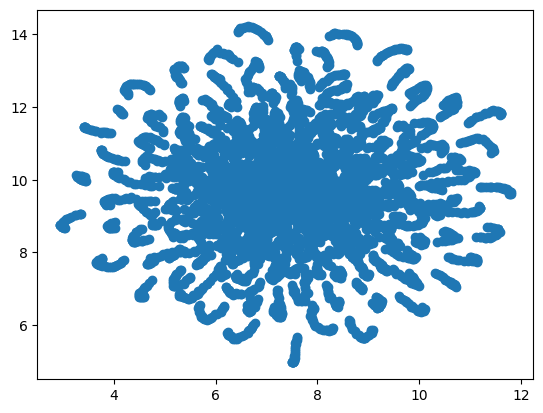

In [6]:
plt.scatter(X_train_umap[:, 0], X_train_umap[:, 1])

,0,1,2,3,4,5,6,7,8,9,...,719,720,721,722,723,724,725,726,727,728
0,14.420406,-12.324065,12.018090,-0.213496,9.505812,4.382430,-10.068916,1.650970,-3.772569,2.262365,...,-0.066346,0.727334,-0.130721,0.317124,0.550226,0.184242,0.096787,-0.076302,-0.340182,-0.252699
1,13.436869,-14.001388,11.132509,0.490461,8.861924,5.273456,-7.088264,1.231621,-1.109755,2.566129,...,-0.111845,0.366317,0.097113,0.004304,0.644086,-0.132797,0.390258,-0.426297,0.009270,0.057412
2,19.453969,1.990193,12.689950,-1.898674,6.765935,-2.349533,-7.429914,-0.059659,4.054074,-5.382576,...,0.089430,0.241657,0.128669,0.235109,-0.305676,0.043250,-0.391156,0.417509,-0.497222,-0.112021
3,19.552206,2.441715,13.873658,-5.625615,0.931618,-4.407896,-9.777011,2.465891,0.832456,-3.787513,...,0.415111,0.928591,0.179530,0.381365,-0.057354,-0.726452,-0.210965,0.418102,0.311018,-0.233631
4,6.232112,-14.217425,11.227079,2.782379,9.954343,2.405186,-8.037276,3.988055,-4.343656,1.113580,...,0.158258,-0.093300,0.702300,-0.348746,0.026436,-0.003067,0.104693,0.021046,0.369032,0.341984


In [ ]:
#